# Customizing the look and feel of your GIS

As an administrator of your GIS, you can configure the appearance of the portal website to make it home for your users. The `UX` class of the `admin` sub module can be used to customize the look and feel of your portal website by setting the name, description, logo, background image, banner image, default basemap, extent etc.

You can use the `UX` class on organizations hosted on ArcGIS Online or ArcGIS Enterprise. To note here, the GIS connection can be created by using username/password, e.g. `gis = GIS("portalname.domain.com/webadaptor", "username", "password")`, or through an existing profile.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customizing-the-look-and-feel-of-your-GIS" data-toc-modified-id="Customizing-the-look-and-feel-of-your-GIS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customizing the look and feel of your GIS</a></span><ul class="toc-item"><li><span><a href="#Setting-name-and-description" data-toc-modified-id="Setting-name-and-description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting name and description</a></span></li><li><span><a href="#Setting-logo,-banner-and-background-images" data-toc-modified-id="Setting-logo,-banner-and-background-images-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setting logo, banner and background images</a></span><ul class="toc-item"><li><span><a href="#Download-existing-customizations" data-toc-modified-id="Download-existing-customizations-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Download existing customizations</a></span></li><li><span><a href="#Resetting-customization" data-toc-modified-id="Resetting-customization-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Resetting customization</a></span></li></ul></li><li><span><a href="#Setting-featured-content" data-toc-modified-id="Setting-featured-content-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setting featured content</a></span></li></ul></li></ul></div>

In [1]:
from arcgis.gis import GIS
gis = GIS(profile="your_ent_admin_profile")

When you install ArcGIS Enterprise or create a new organization on ArcGIS Online, it would look similar to the image shown below:

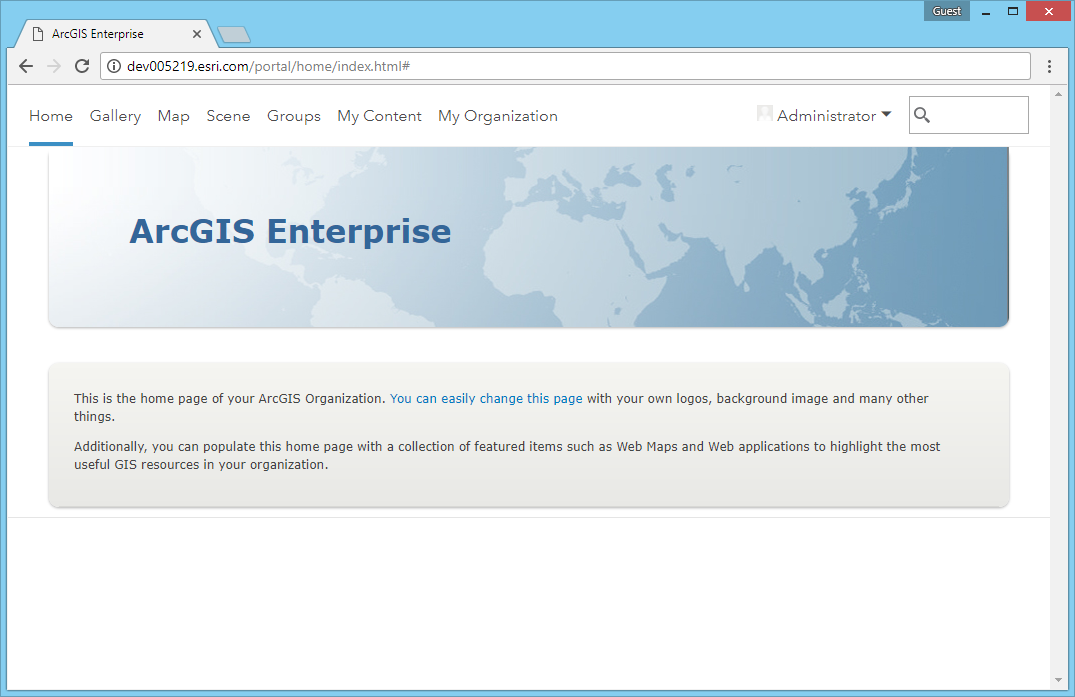</img>

The rest of this guide walks you through customizing this GIS. As an example, this guide chooses to customize this GIS for Public Works Department of the city of Los Angeles.

## Setting name and description
Use the `name` and `description` to both query and set them on the GIS.

In [2]:
gis.admin.ux.name

'ArcGIS Enterprise'

In [3]:
gis.admin.ux.description

'<br>'

In [4]:
gis.admin.ux.description_visibility

False

To set new name and description, simply set these properties

In [5]:
gis.admin.ux.name = 'LA PWD GIS'
gis.admin.ux.description = 'Spatial information portal for the Public Works Department of the city of Los Angeles'
gis.admin.ux.description_visibility = True

Once the name and description is set, the portal website looks like below:
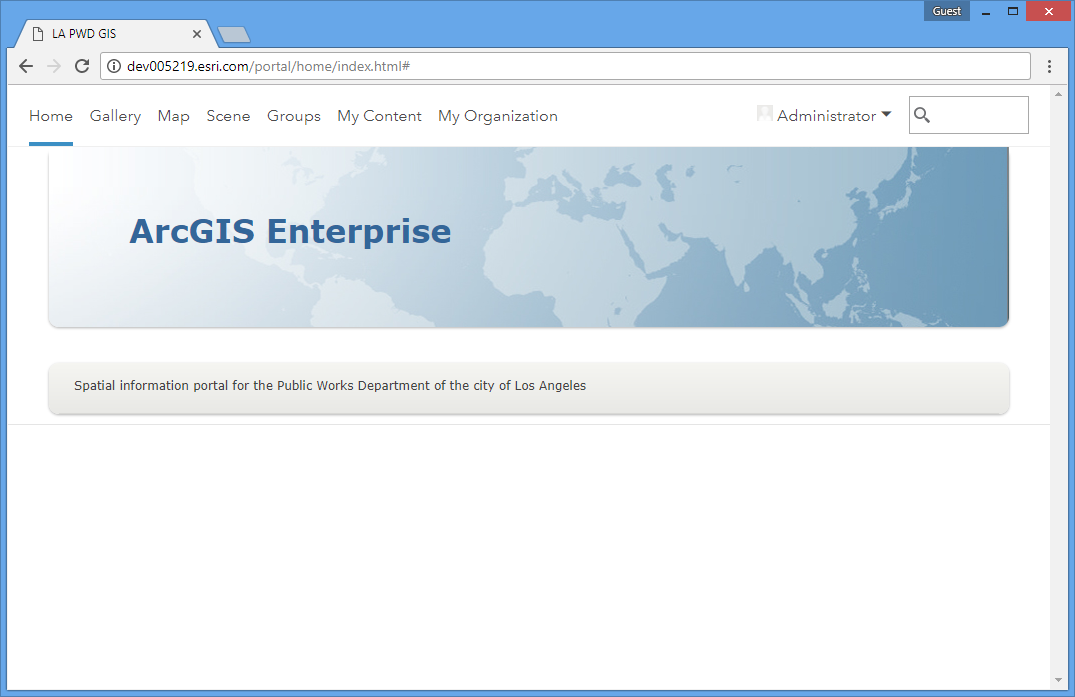</img>

<blockquote><b>Note</b>: The name of the GIS shows up in the browser tab name. Description shows up in the gray bar. To update the large 'ArcGIS Enterprise' text, you need to update the banner image as shown below:</blockquote>

## Setting logo, banner and background images
To set the logo, banner and background images, call the `set_logo()`, `set_banner()` and `set_background()` methods. Your GIS might come with a set of built-in images. You can use one of those or upload your own. If using a built-in banner, valid values are `banner-1`, `banner-2`, `banner-3`, `banner-4`, `banner-5` and set the `is_built_in` to `True`. The example below uploads a custom banner and background file from disk.

Python 3.4 introduced a new standard library for dealing with files and paths called `pathlib` — and it’s making things simpler in representing directories and files via absolute or relative paths across different operating systems.

In [6]:
from pathlib import Path

filename = Path('staticimg/background.jpg')
if filename.exists():
    print(gis.admin.ux.set_background(background_file=filename))
else:
    print("file not exists!")

True

In [7]:
filename = Path('staticimg/banner.png')
if filename.exists():
    print(gis.admin.ux.set_banner(banner_file=filename))
else:
    print("file not exists!")

True

In [8]:
filename = Path('staticimg/logo.png')
if filename.exists():
    print(gis.admin.ux.set_logo(logo_file=filename))
else:
    print("file not exists!")

True

Refershing the portal website will render the new appearance:
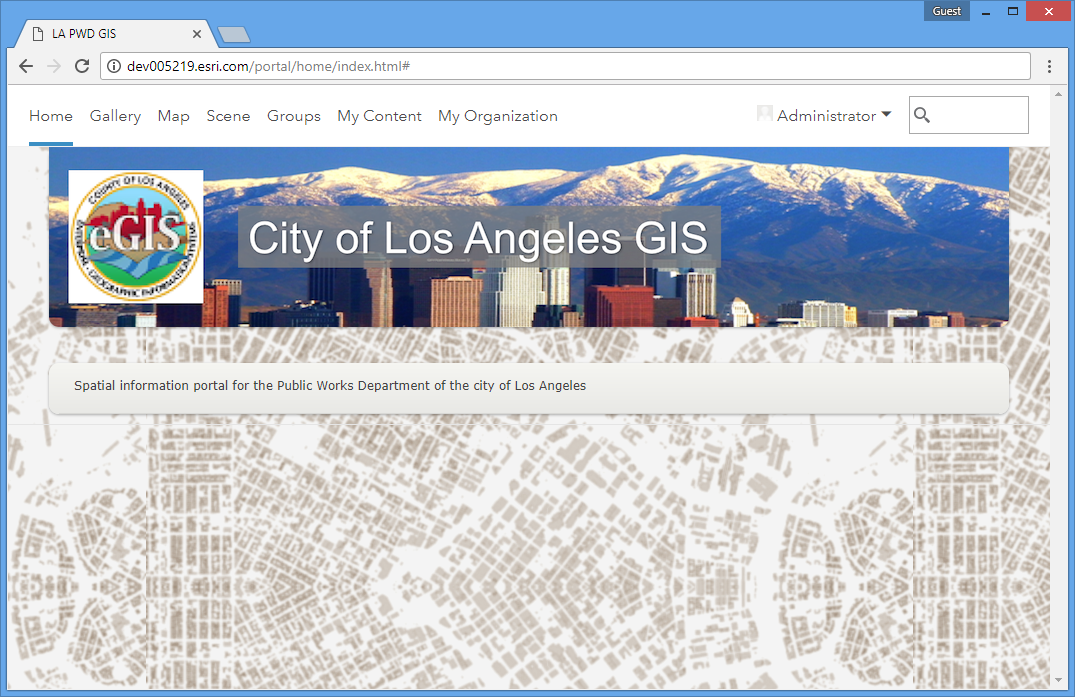</img>

<blockquote><b>Note:</b> Refer the help on <a href="http://server.arcgis.com/en/portal/latest/administer/windows/configure-home.htm"> configuring home page</a> to understand the dimensions of the images for best appearance. You can also pass custom HTML code while setting the banner. To learn more about that <a href="http://server.arcgis.com/en/portal/latest/administer/windows/supported-html.htm">refer here</a>.</blockquote>

### Download existing customizations
You can download the current banner, logo, background values using the corresponding `get` methods

In [3]:
dirname = Path('staticimg/downloads')
if dirname.exists():
    print(gis.admin.ux.get_banner(download_path = dirname))
else:
    print("downloading folder not exists!")

staticimg\downloads\banner.jpg


### Resetting customization
You can reset logo, banner and background by specifying `None` as the argument. Below, the custom background is reset and the built-in background is applied. The portal comes with just 1 default background, hence a name is not required to set it.

In [10]:
gis.admin.ux.set_background(background_file=None, is_built_in=False)

True

In [11]:
gis.admin.ux.set_background(is_built_in=True)

True

## Setting featured content
You can designate the contents of a group to show up as featured content on the home page.

In [12]:
#get the list of groups in the GIS and select one of the groups
gis.groups.search()

[<Group title:"Basemaps" owner:admin>,
 <Group title:"Central Services" owner:admin>,
 <Group title:"Compliance" owner:admin>,
 <Group title:"Customer Service, Finance, Billing and Accounting" owner:admin>,
 <Group title:"Demographic Content" owner:admin>,
 <Group title:"Esri Boundary Layers" owner:esri_boundaries>,
 <Group title:"Esri Demographic Layers" owner:esri_demographics>,
 <Group title:"grp_Transport_PD_data_sharing" owner:admin>,
 <Group title:"Living Atlas" owner:esri_livingatlas>,
 <Group title:"Living Atlas Analysis Layers" owner:esri_livingatlas>,
 <Group title:"Navigator Maps" owner:esri_nav>,
 <Group title:"Traffic incident analysis" owner:admin>]

<Group title:"Traffic incident analysis" owner:admin>
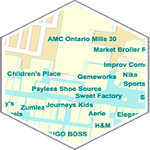

In [13]:
traffic_group = gis.groups.search()[-1]
traffic_group

Set the Traffic incident analysis group as featured content.

In [19]:
gis.admin.ux.featured_content = {'group':traffic_group}

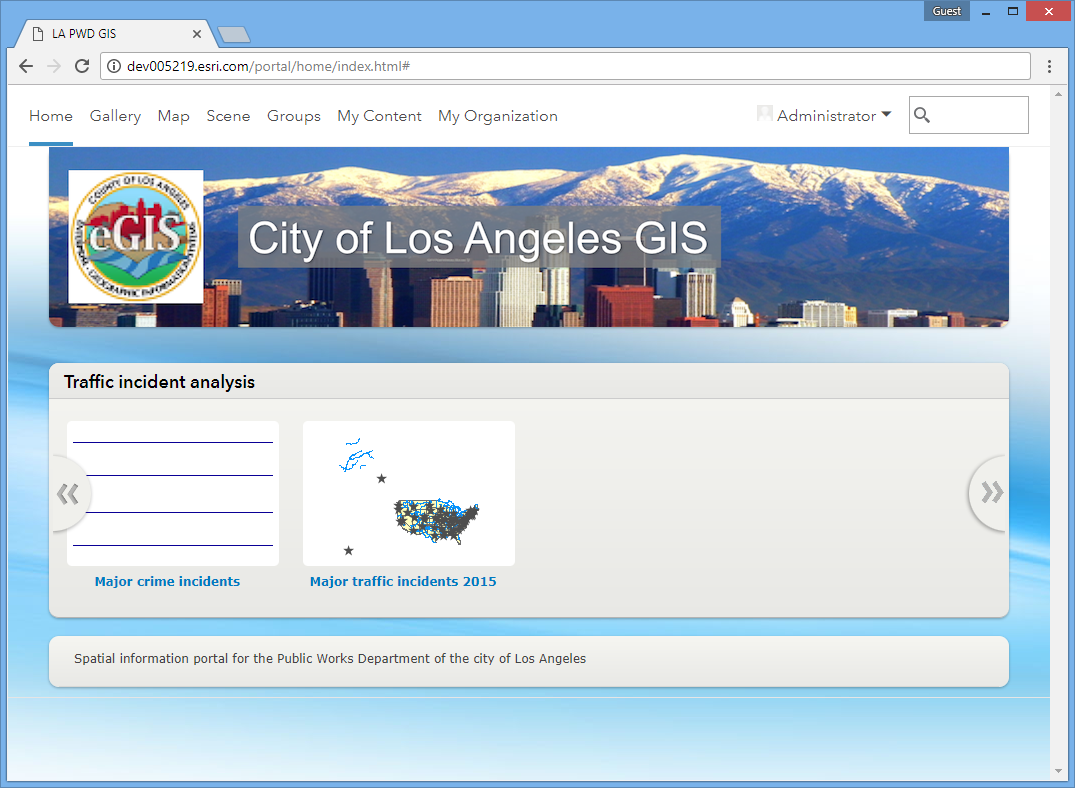</img>
The home page appears as above after the featured content is set.